### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [238]:
#your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [193]:
#your code here
userDF = pd.read_csv('user.csv')
userRatingDF = pd.read_csv('Data.csv')
movieDF = pd.read_csv('item.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [139]:
#your code here
#user
userDF.info()
userDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [140]:
userDF.shape

(943, 5)

In [141]:
pd.DataFrame( userDF.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


In [142]:
#movieData
movieDF.info()
movieDF.describe()
movieDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [143]:
movieDF.shape

(1681, 22)

In [144]:
pd.DataFrame( movieDF.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [145]:
#user rating on types of movie 
userRatingDF.info()
userRatingDF.describe()
userRatingDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [146]:
userRatingDF.shape

(100000, 4)

In [147]:
pd.DataFrame(userRatingDF.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


**Observations:**
1.No missing values. 
2.There is one unknown column in movie. 
3.





### 4. Find the number of movies per genre using the item data - 2.5 marks

In [236]:
#your code here
print(movieDF.sum())

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

**Insights:**



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [166]:
#your code here
movieDF.drop(movieDF[movieDF['unknown'] == 1].index, inplace = True) 
movieDF

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Insights:**


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [91]:
movieDF = pd.read_csv('item.csv')
movieDF['Total']=movieDF.sum(axis=1)-movieDF['movie id']
print(movieDF[['movie title','Total']])
totalgeneresgt1 = sum((movieDF['Total'] > 1) == True)
print(totalgeneresgt1)


                              movie title  Total
0                              Toy Story       3
1                              GoldenEye       3
2                             Four Rooms       1
3                             Get Shorty       3
4                                Copycat       3
...                                   ...    ...
1676                          Mat' i syn       1
1677                           B. Monkey       2
1678                       Sliding Doors       2
1679                        You So Crazy       1
1680  Scream of Stone (Schrei aus Stein)       1

[1681 rows x 2 columns]
849


**Insights:**



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [43]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])



brown
brown
brown


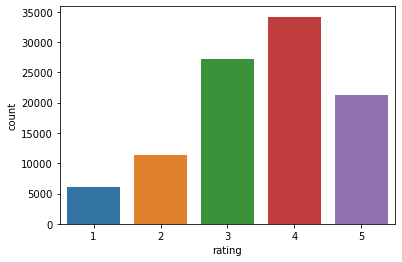

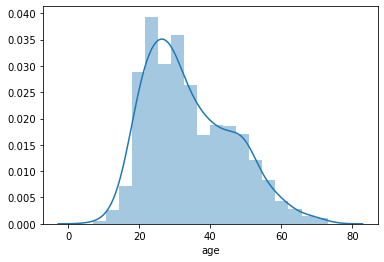

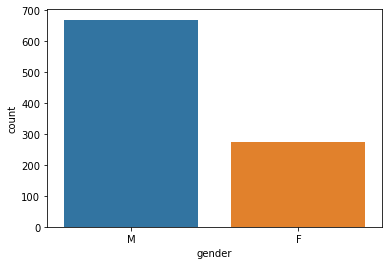

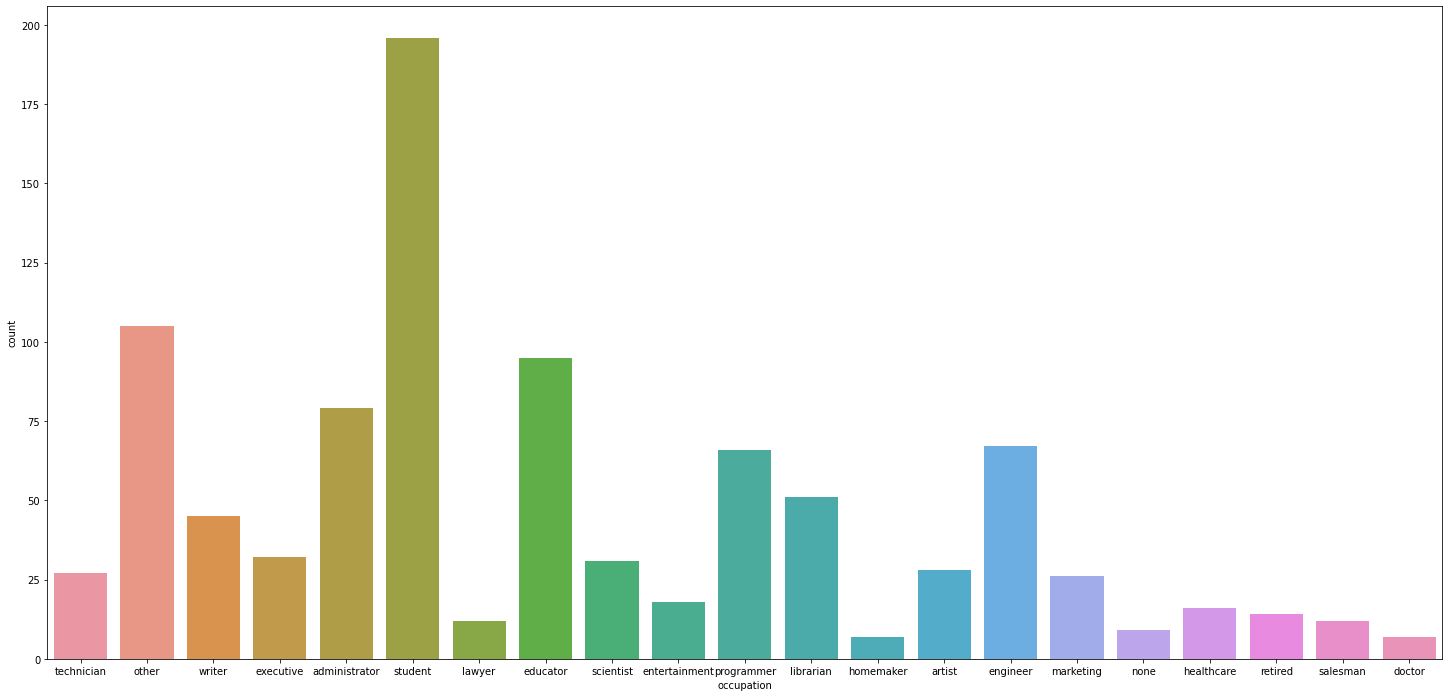

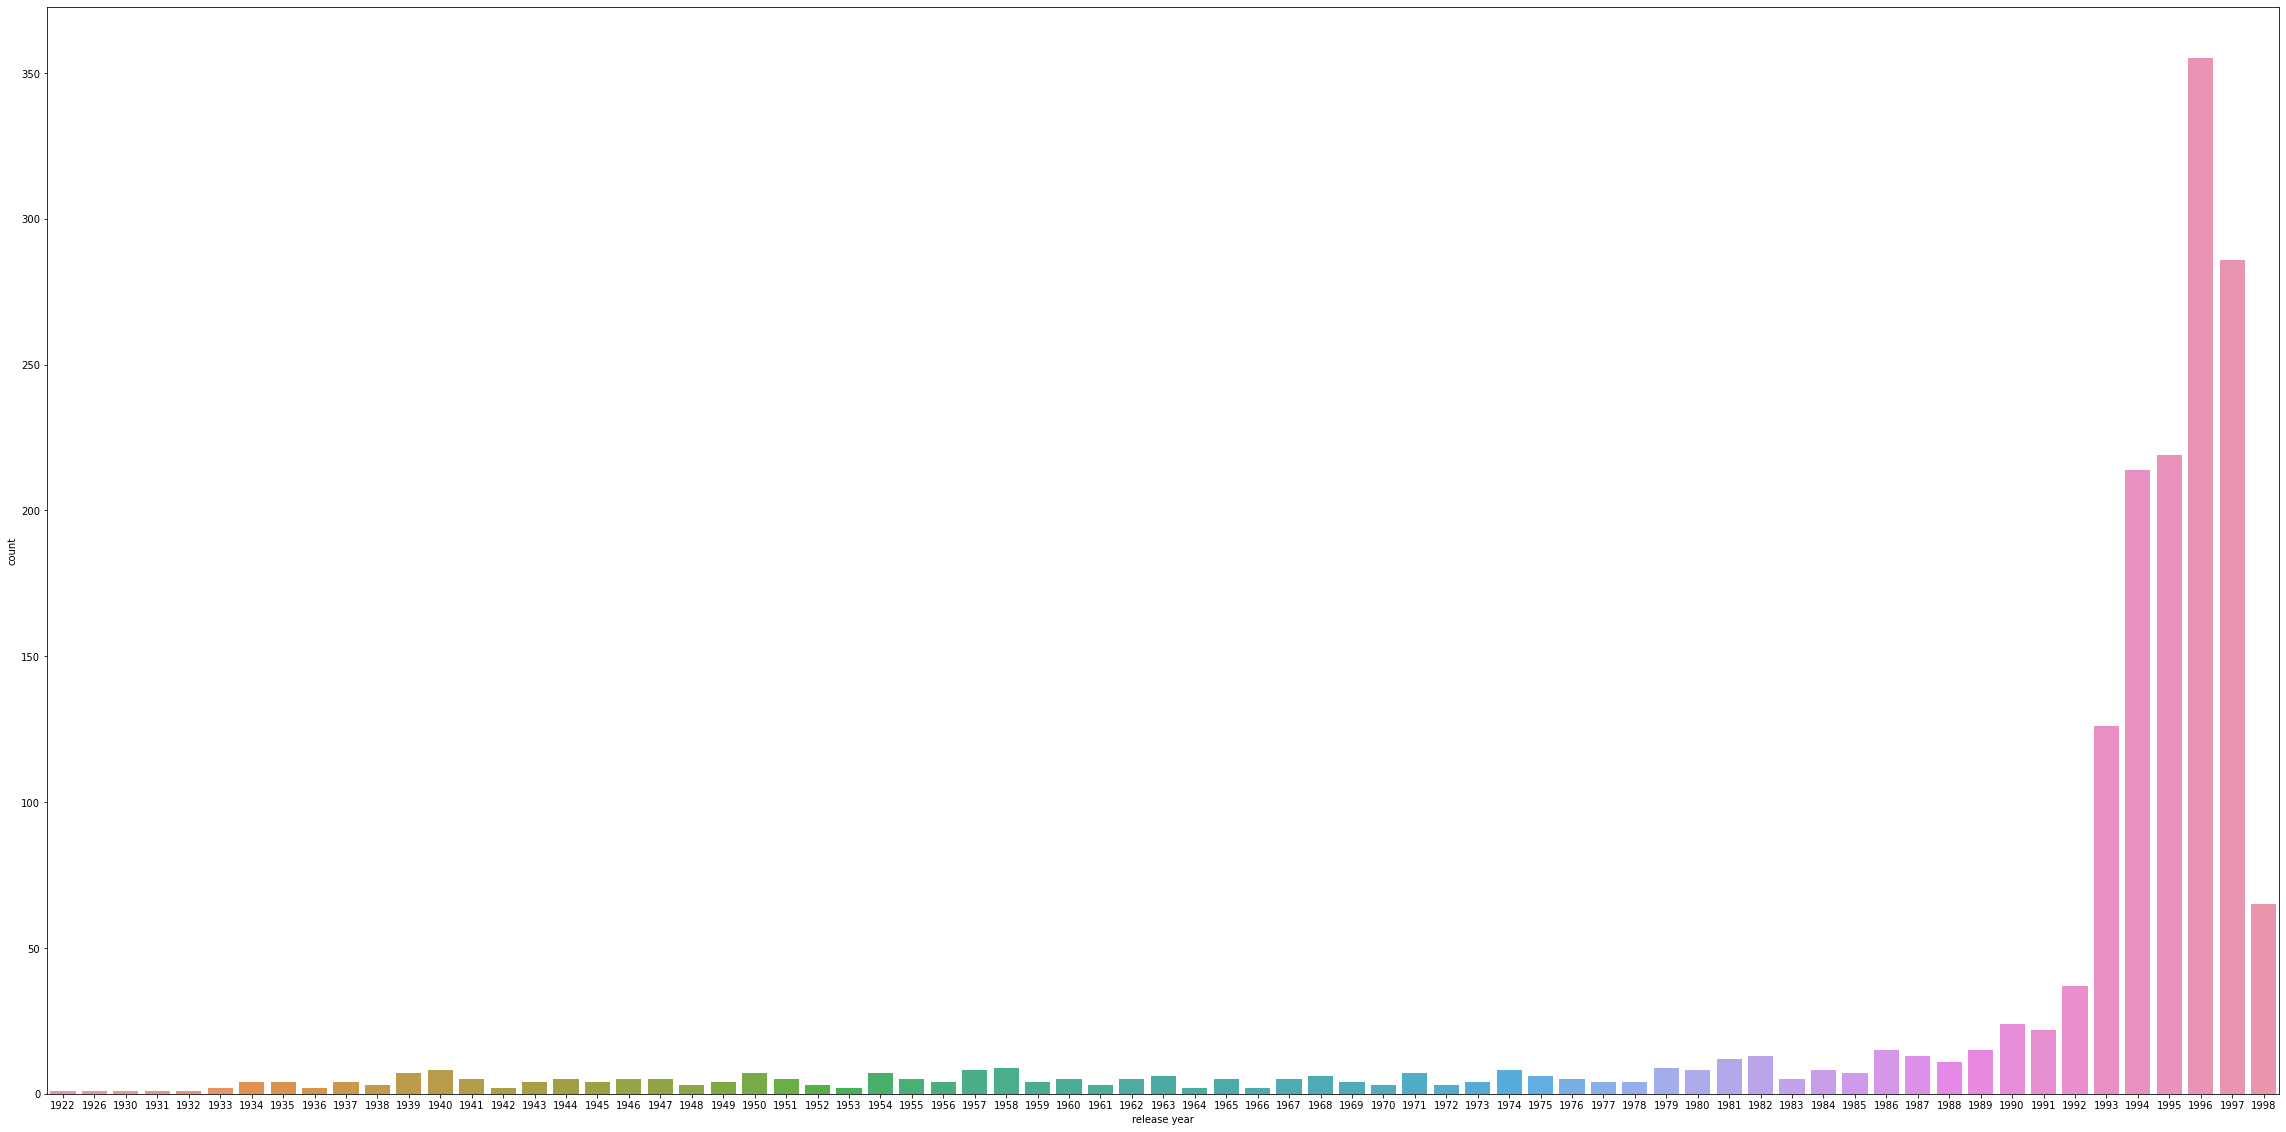

In [71]:
#your code here
userDF = pd.read_csv('user.csv')
userRatingDF = pd.read_csv('Data.csv')
movieDF = pd.read_csv('item.csv')

sns.countplot(userRatingDF['rating'])
plt.show()

sns.distplot(userDF['age'])
plt.show()


sns.countplot(userDF['gender'])
plt.show()

plt.figure(figsize=(25,12))
sns.countplot(userDF['occupation'])
plt.show()

movieDF['release year'] = pd.DatetimeIndex(movieDF['release date']).year
plt.figure(figsize=(40,20))
sns.countplot(movieDF['release year'])
plt.show()
#movieDF = pd.read_csv('item.csv')
#dataFrames = [userDF,movieDF,userRatingDF]
#completeDataFrame = pd.concat(dataFrames)
#print(completeDataFrame)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

              unknown    Action  Adventure  Animation  Childrens    Comedy  \
release year                                                                 
1995              0.0  0.000000   0.000000   0.456621   0.456621  0.456621   
1995              0.0  0.456621   0.456621   0.000000   0.000000  0.000000   
1995              0.0  0.000000   0.000000   0.000000   0.000000  0.000000   
1995              0.0  0.456621   0.000000   0.000000   0.000000  0.456621   
1995              0.0  0.000000   0.000000   0.000000   0.000000  0.000000   
...               ...       ...        ...        ...        ...       ...   
1998              0.0  0.000000   0.000000   0.000000   0.000000  0.000000   
1998              0.0  0.000000   0.000000   0.000000   0.000000  0.000000   
1998              0.0  0.000000   0.000000   0.000000   0.000000  0.000000   
1994              0.0  0.000000   0.000000   0.000000   0.000000  0.467290   
1996              0.0  0.000000   0.000000   0.000000   0.000000

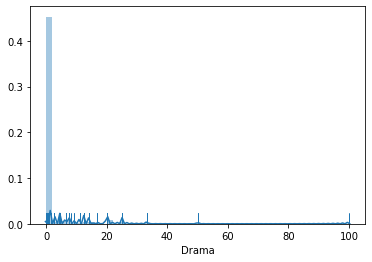

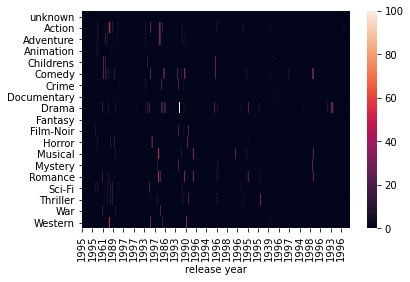

In [239]:
#your code here
movDF = pd.read_csv('item.csv')
movDF['release year'] = pd.DatetimeIndex(movDF['release date']).year
newMovDF = movDF.drop(['movie id','movie title','release date'],axis=1)
newMovDF = newMovDF.set_index('release year')
newMovDF['total'] = newMovDF.groupby('release year').size()
percentDF = newMovDF.div(newMovDF['total'],axis=0)*100

#newMovDF['total'] =newMovDF.sum(newMovDF.groupby(newMovDF['release year']))
#newMovDF
percentDF= percentDF.drop(['total'],axis=1)
print(percentDF)
sns.distplot(percentDF['Drama'],kde=True,rug=True)
plt.show()

#df = pd.DataFrame(abs(np.random.randn(1, 19)), index=percentDF['release year'], columns=percentDF.columns)
#plt.figure(figsize=(50,50))
sns.heatmap(percentDF.T)
plt.show()
#print(movDF[['movie title','release year']])
#movieDF['total'] = movieDF.groupby(pd.DatetimeIndex(movieDF['release date']).year).size()
#movieDF.div(movieDF['total'],axis=0)*100
#print(movieDF[['movie title','total']])

**Insights:**



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [78]:
#your code here
ratingDF = pd.read_csv('Data.csv')
#ratingMean = ratingDF.groupby('movie id')['rating'].mean().reset_index(name='Mean')
#ratingSort = ratingMean.sort_values(by=['Mean'],ascending=False)
#print(ratingSort.head(25))

nratingMean = ratingDF.groupby('movie id').agg({'rating':[np.size]})
nratingMean.head()
nratingSort = nratingMean.sort_values([('rating','size')],ascending=False)
top25Movies = nratingSort.head(25)
top25Movies
moviesDF = pd.read_csv('item.csv')
pd.merge(top25Movies,moviesDF,on='movie id')
#rating_by_movieid.sort_values(by=['rating'])
#
#print(movDF[['movie title','release year']])


,movie id,"(rating, size)",movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,50,583,Star Wars,01-Jan-1977,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,258,509,Contact,11-Jul-1997,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100,508,Fargo,14-Feb-1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,181,507,Return of the Jedi,14-Mar-1997,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,294,485,Liar Liar,21-Mar-1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,286,481,"English Patient, The",15-Nov-1996,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,288,478,Scream,20-Dec-1996,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,1,452,Toy Story,01-Jan-1995,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,300,431,Air Force One,01-Jan-1997,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,121,429,Independence Day (ID4),03-Jul-1996,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

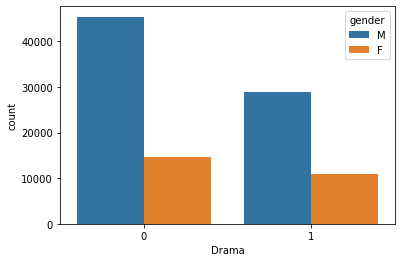

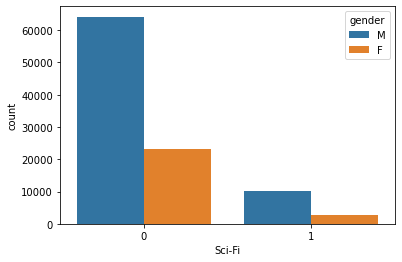

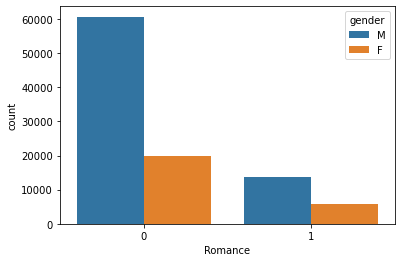

In [164]:
#your code here
userRatingDF = pd.read_csv('Data.csv')
moviesDF = pd.read_csv('item.csv')
userDF = pd.read_csv('user.csv')
userAndRatingDF = pd.merge(userDF,userRatingDF,on='user id')
#userAndRatingDF.tail(10)
allDFMerge = pd.merge(userAndRatingDF,moviesDF,on='movie id')
allDFMerge = allDFMerge.drop_duplicates()
sns.countplot(x='Drama', data=allDFMerge, hue=allDFMerge['gender']);
plt.show()

sns.countplot(x='Sci-Fi', data=allDFMerge, hue=allDFMerge['gender']);
plt.show()

sns.countplot(x='Romance', data=allDFMerge, hue=allDFMerge['gender']);
plt.show()



**Conclusion:**
    1.True, Men watch more Drama than Women;
    2.False, Women dont watch more Sci-Fi than Men;
    3.True, Men watch more Romance than Woman.
    
